<a href="https://colab.research.google.com/github/Machforo/project_banglore/blob/main/project_banglore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [6]:
import pandas as pd
data= pd.read_csv('/content/drive/MyDrive/bangalore_od_travelling.csv')
data1=pd.read_csv('/content/drive/MyDrive/bangalore_od_transit.csv')

In [7]:
data

,sourceid,destid,distance,duration,duration_in_traffic
0,2,3,4768,814,1182
1,2,4,4994,789,1213
2,2,51,21782,2598,4726
3,2,53,29096,3478,6454
4,2,54,25672,3124,5809
...,...,...,...,...,...
38991,198,177,12552,2063,3734
38992,198,172,15622,2695,4305
38993,198,26,29009,4605,8795
38994,198,25,29112,4580,8266


In [8]:
data1

,sourceid,destid,distance,duration,fare
0,2,3,8869,3169,20
1,2,4,5461,2377,20
2,2,51,22815,6046,39
3,2,53,29207,7981,100
4,2,54,27843,7293,95
...,...,...,...,...,...
38623,198,177,14618,5079,35
38624,198,172,16863,5422,40
38625,198,26,34936,10066,71
38626,198,25,35081,9023,75


In [14]:
final_data=pd.merge(data,data1,on=['sourceid','destid'])
final_data


,sourceid,destid,distance_x,duration_x,duration_in_traffic,distance_y,duration_y,fare
0,2,3,4768,814,1182,8869,3169,20
1,2,4,4994,789,1213,5461,2377,20
2,2,51,21782,2598,4726,22815,6046,39
3,2,53,29096,3478,6454,29207,7981,100
4,2,54,25672,3124,5809,27843,7293,95
...,...,...,...,...,...,...,...,...
38613,198,177,12552,2063,3734,14618,5079,35
38614,198,172,15622,2695,4305,16863,5422,40
38615,198,26,29009,4605,8795,34936,10066,71
38616,198,25,29112,4580,8266,35081,9023,75


In [18]:
# making the data relevant
final_data['distance_x']= (final_data['distance_x']+final_data['distance_y'])/2
final_data['duration_x']=(final_data['duration_x']+final_data['duration_y'])/2
final_data.pop('duration_y')
final_data.pop('distance_y')
final_data

KeyError: ignored

In [19]:
final_data

,sourceid,destid,distance_x,duration_x,duration_in_traffic,fare
0,2,3,8356.375,2580.25,1182,20
1,2,4,5402.625,1980.00,1213,20
2,2,51,22685.875,5184.00,4726,39
3,2,53,29193.125,6855.25,6454,100
4,2,54,27571.625,6250.75,5809,95
...,...,...,...,...,...,...
38613,198,177,14359.750,4325.00,3734,35
38614,198,172,16707.875,4740.25,4305,40
38615,198,26,34195.125,8700.75,8795,71
38616,198,25,34334.875,7912.25,8266,75


In [20]:
######################[PREPROCESSING COMPLETE]##############################################

In [21]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import networkx as nx
G = nx.Graph()

In [24]:
# representaion
G=nx.from_pandas_edgelist(final_data,'sourceid','destid')

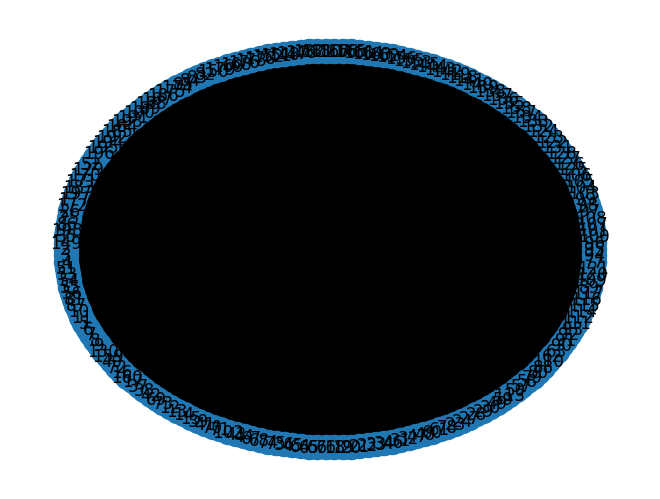

In [26]:
from matplotlib.pyplot import figure
#figure(figsize=(10,8))
nx.draw_shell(G, with_labels=True)

In [28]:
G[2]

AtlasView({3: {}, 4: {}, 51: {}, 53: {}, 54: {}, 55: {}, 56: {}, 81: {}, 87: {}, 10: {}, 11: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 130: {}, 159: {}, 40: {}, 72: {}, 16: {}, 160: {}, 17: {}, 37: {}, 38: {}, 42: {}, 69: {}, 73: {}, 12: {}, 13: {}, 14: {}, 15: {}, 39: {}, 41: {}, 70: {}, 71: {}, 102: {}, 43: {}, 44: {}, 67: {}, 68: {}, 74: {}, 75: {}, 36: {}, 45: {}, 64: {}, 65: {}, 66: {}, 76: {}, 18: {}, 19: {}, 20: {}, 21: {}, 22: {}, 33: {}, 34: {}, 46: {}, 31: {}, 32: {}, 47: {}, 48: {}, 60: {}, 61: {}, 78: {}, 23: {}, 24: {}, 27: {}, 28: {}, 29: {}, 30: {}, 49: {}, 59: {}, 113: {}, 50: {}, 57: {}, 58: {}, 79: {}, 80: {}, 88: {}, 110: {}, 62: {}, 63: {}, 90: {}, 91: {}, 92: {}, 93: {}, 111: {}, 112: {}, 114: {}, 115: {}, 116: {}, 117: {}, 89: {}, 109: {}, 120: {}, 121: {}, 77: {}, 94: {}, 95: {}, 96: {}, 100: {}, 101: {}, 107: {}, 108: {}, 97: {}, 98: {}, 99: {}, 103: {}, 104: {}, 105: {}, 106: {}, 125: {}, 126: {}, 127: {}, 128: {}, 131: {}, 122: {}, 123: {}, 124: {}, 132: {}, 133:

In [29]:
leaderboard = {}
for x in G.nodes:
 leaderboard[x] = len(G[x])
s = pd.Series(leaderboard, name='connections')
df2 = s.to_frame().sort_values('connections', ascending=False)

df2

,connections
2,197
158,197
136,197
137,197
138,197
...,...
28,197
29,197
30,197
49,197


In [33]:
c=0
for x in final_data['sourceid']:
  if(x==158):
    c=c+1
#print(c)    

for y in final_data['destid']:
  if(x==158):
    c=c+1
print(c)    

################hhence proved no. of connections are right###################################

195


In [37]:
m=max(final_data['sourceid'])
mi=min(final_data['sourceid'])
print(m)
print(mi)

198
1


In [38]:
###########################all possible combinations are present#########################################

In [42]:
# percentage weightage to each parameter
a=int(input('weight for distance '))
b=int(input('weightage for duration '))
c=int(input('weightage for duration in traffic '))
d=int(input('weightage for fare '))

if(a+b+c+d!=100):
  print('WRONG I/P TRY AGAIN')
else:  
  print('OK PROCEEDING FORWARD')

weight for distance 40
weightage for duration 20
weightage for duration in traffic 20
weightage for fare 20
OK PROCEEDING FORWARD


In [43]:
def percent_weight(a,per):
  d=[]
  for x in a:
    x1=(x*per)/100
    d.append(x1)
  return d
    


In [46]:
d1=percent_weight(final_data['distance_x'],a)
d2=percent_weight(final_data['duration_x'],b)
d3=percent_weight(final_data['duration_in_traffic'],c)
d4=percent_weight(final_data['fare'],d)

d_fin=[]
for x in range(len(d1)):
  d_fin.append(d1[x]+d2[x]+d3[x]+d4[x])

final_data['composition_used']=d_fin

final_data

,sourceid,destid,distance_x,duration_x,duration_in_traffic,fare,composition_used
0,2,3,8356.375,2580.25,1182,20,4099.00
1,2,4,5402.625,1980.00,1213,20,2803.65
2,2,51,22685.875,5184.00,4726,39,11064.15
3,2,53,29193.125,6855.25,6454,100,14359.10
4,2,54,27571.625,6250.75,5809,95,13459.60
...,...,...,...,...,...,...,...
38613,198,177,14359.750,4325.00,3734,35,7362.70
38614,198,172,16707.875,4740.25,4305,40,8500.20
38615,198,26,34195.125,8700.75,8795,71,17191.40
38616,198,25,34334.875,7912.25,8266,75,16984.60


In [47]:
########### giving weights calculated to the network ##############################

In [51]:
G1=nx.Graph()

# Add edges and edge attributes
for i, elrow in final_data.iterrows():
    G1.add_edge(elrow[0], elrow[1], attr_dict=elrow[6:].to_dict())


In [53]:
# Edge list example
print(elrow[0]) # node1
print(elrow[1]) # node2
print(elrow[6:].to_dict()) # edge attribute dict

198.0
86.0
{'composition_used': 17174.8}


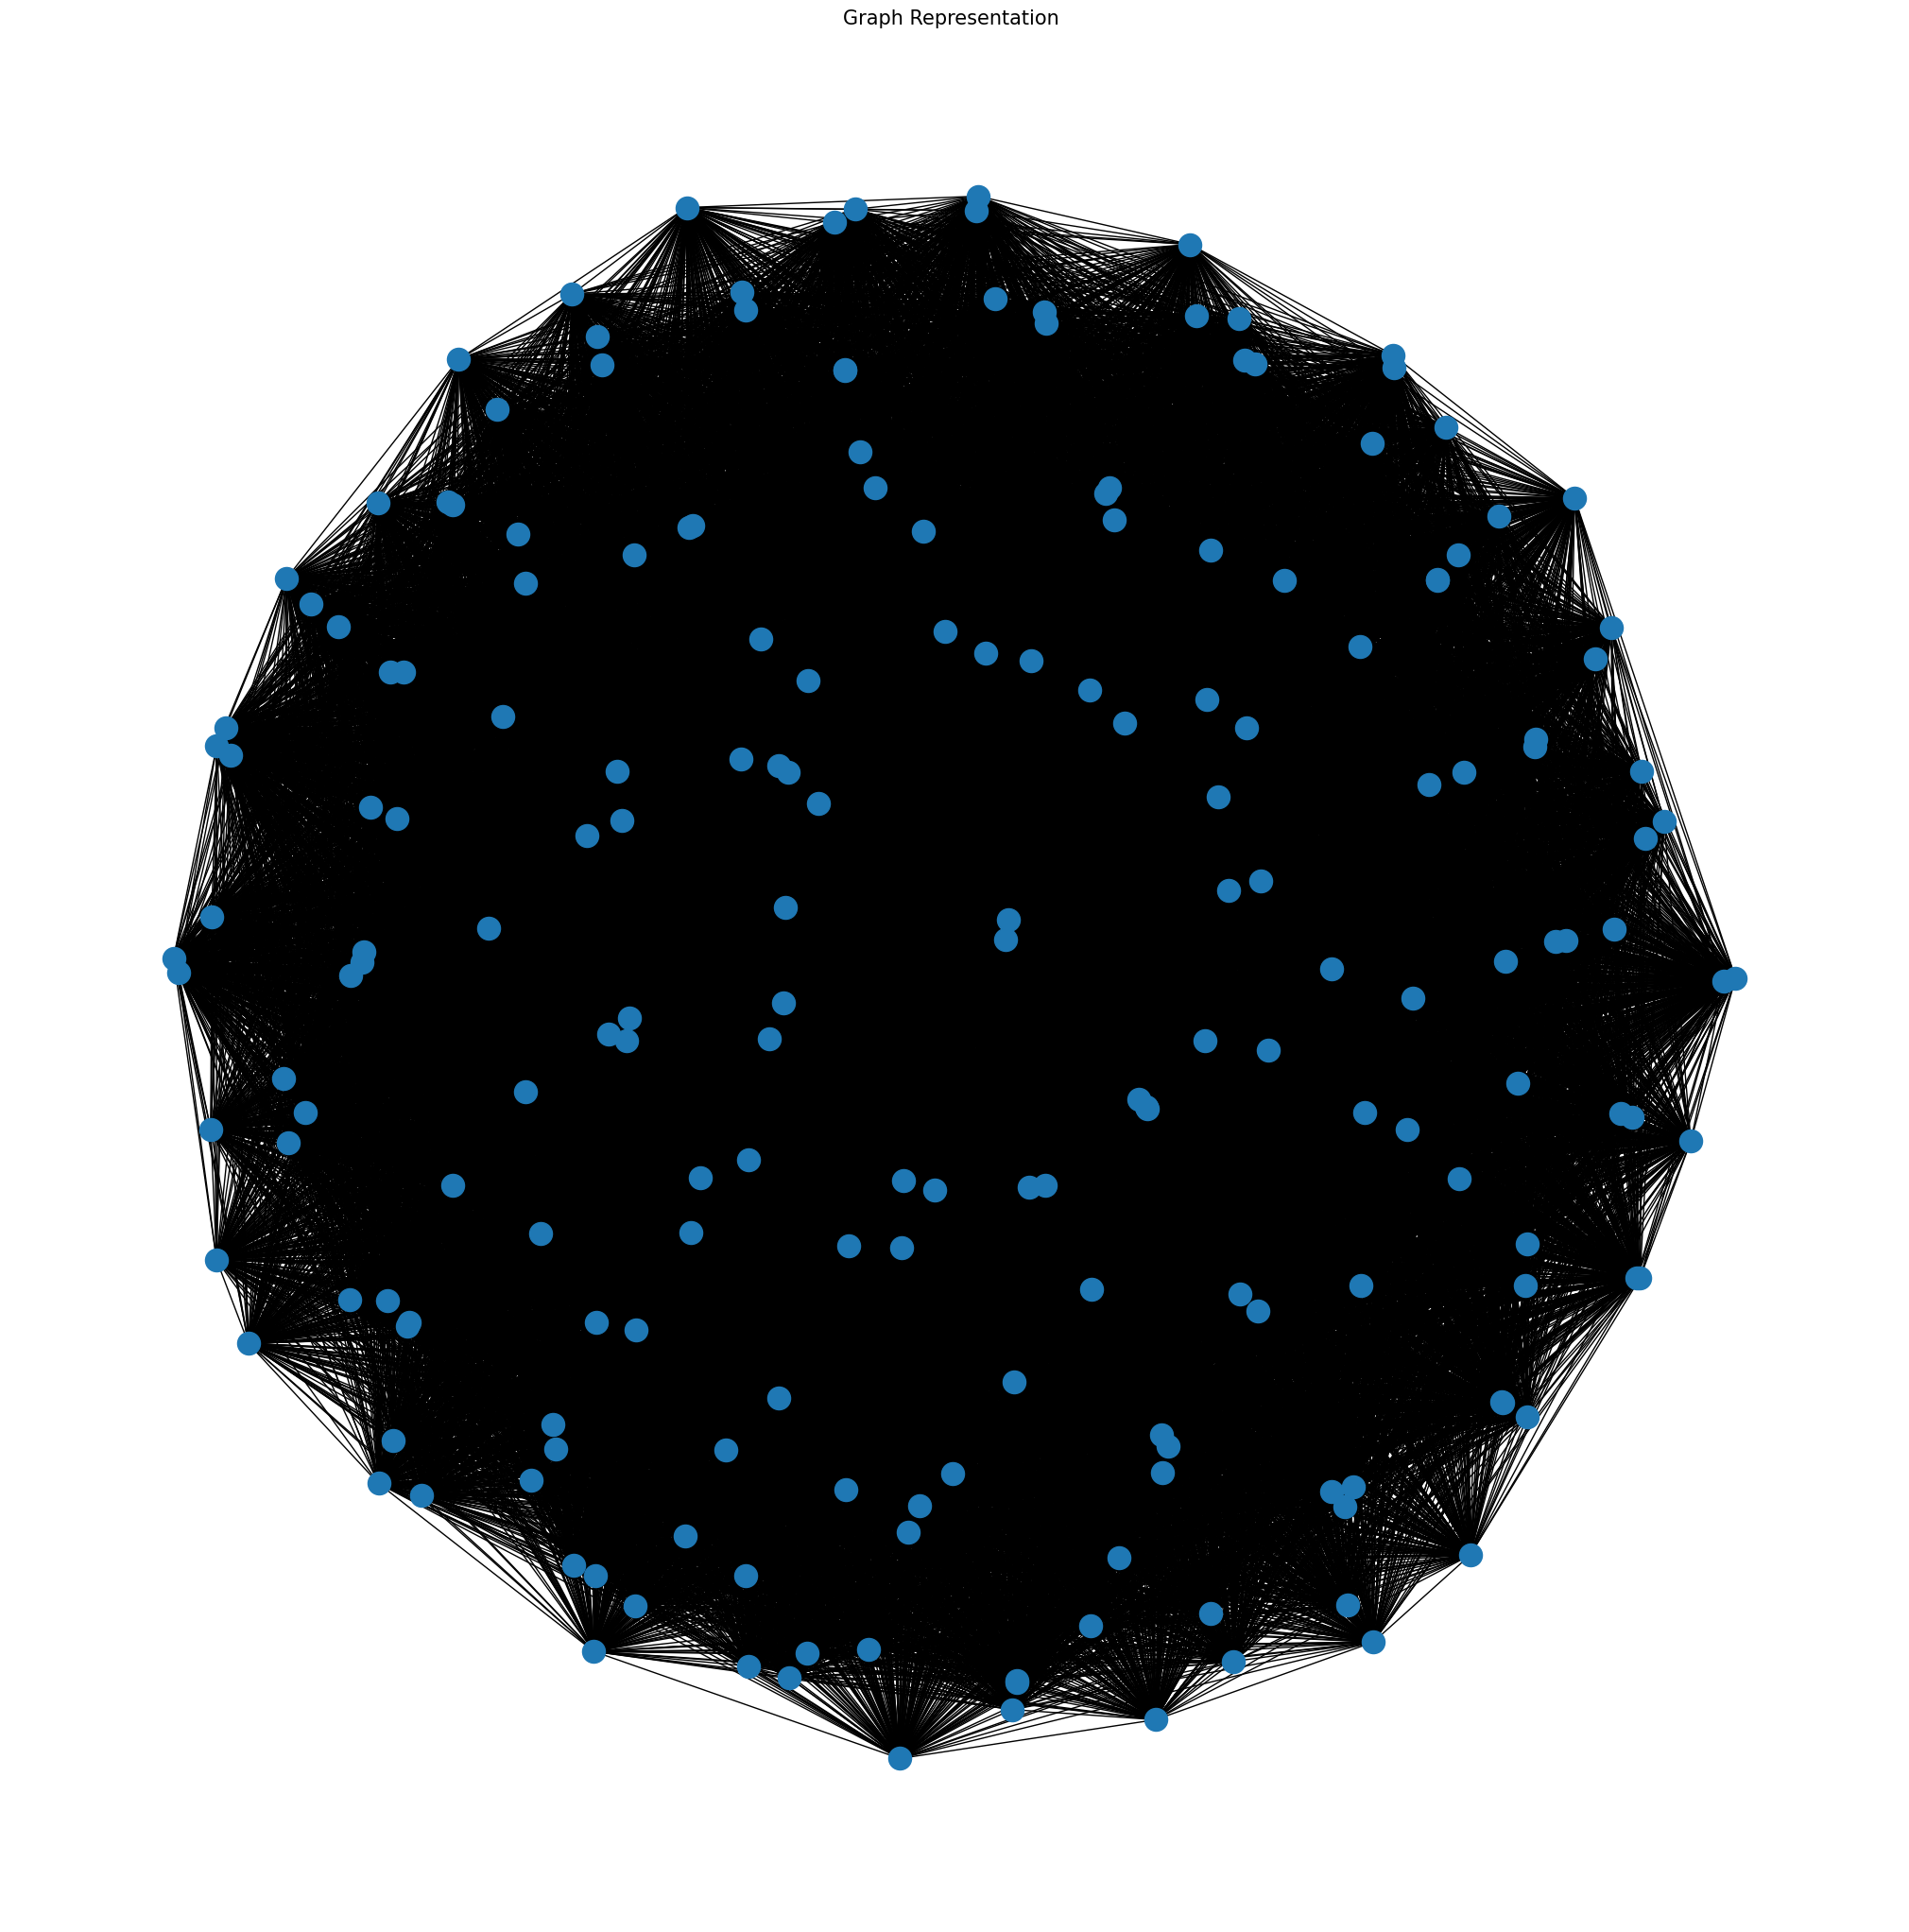

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
nx.draw(G1)
plt.title('Graph Representation ', size=15)
plt.show()

In [62]:
################[FINDING THE BEST PATH FOR THE USER]###########################################